In [5]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)
import matplotlib.pyplot as plt
import progressbar
import scipy
import random

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py,progressbar,scipy

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.7
IPython version      : 7.18.1

pandas     : 1.2.0
keras      : 2.4.3
numpy      : 1.19.5
math       : unknown
tensorflow : 2.4.0
matplotlib : 3.3.3
h5py       : 2.10.0
progressbar: 2.5
scipy      : 1.5.2

Compiler    : Clang 12.0.0 (clang-1200.0.32.28)
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Feb 02 2021 11:13:39CET



## Load of the data

In [3]:
from process import loaddata
class_data = loaddata("../data/classifier/250.csv")

In [4]:
np.random.shuffle(class_data)
y = class_data[:,-7:-4]
x = class_data[:,1:7]

In [5]:
class_data[0,1:7]

array([-0.00553876,  0.09539253, -0.10516088, -0.02484936,  0.00353553,
        0.01921132])

In [8]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 250828 
Valuation sample: 83610


In [9]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras import regularizers

## Test spectrum

In [29]:
from tensorflow import keras
model = keras.models.load_model('../models/classificationandregression/large_mse250.h5')

## Simulation setup

In [10]:
def generate_electron(gamma):
    px = 0
    py = 0
    pz = gamma
    return np.array([px, py, pz])

In [24]:
def generate_photon(modulus):
    
    a = random.uniform(-1, 1)
    b = random.uniform(-1, 1)
    c = random.uniform(-1, 1)
    direction = np.array([a, b, c])
    direction = direction/np.linalg.norm(direction)

    
    px = modulus*direction[0]
    py = modulus*direction[1]
    pz = modulus*direction[2]
    
    return np.array([px, py, pz])

In [47]:
num_par_x = 1000

modulus = 0.25
gamma = 100

electrons = []
photons = []
for i in range(num_par_x):
    electrons.append(generate_electron(gamma))
    photons.append(generate_photon(modulus))

In [48]:
def pair(electrons, photons):
    pairs = np.concatenate((electrons, photons), axis = 1)
    return pairs

In [49]:
pairs = pair(electrons, photons)
pairs

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+02,
        -1.46243793e-01,  1.76723369e-01, -9.94062565e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+02,
         8.03888855e-02,  2.28885492e-01, -6.04074377e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+02,
        -2.25497850e-01, -1.06153261e-01, -1.95500592e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+02,
         2.15429414e-01, -6.57497195e-02, -1.08476459e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+02,
        -1.44479579e-01, -1.96784098e-01, -5.38671527e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+02,
        -1.09803951e-01, -1.04548668e-01,  1.98777937e-01]])

In [50]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step', density=True)
    plt.yscale("log")
    plt.show()

In [51]:
from tensorflow import keras 
photon_final_nn = []
prediction = model.predict(pairs)

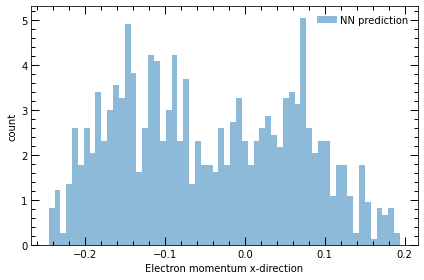

In [52]:
p1e_nn = prediction[:,0] 

plt.hist(p1e_nn, 60, alpha=0.5, label='NN prediction', density = True)
plt.xlabel('Electron momentum x-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
#plt.xlim((0, 0.25))

plt.show()

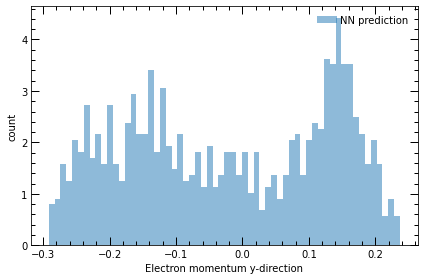

In [53]:
p2e_nn = prediction[:,1] 

plt.hist(p2e_nn, 60, alpha=0.5, label='NN prediction', density = True)

plt.xlabel('Electron momentum y-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
#plt.xlim((0, 0.25))

plt.show()

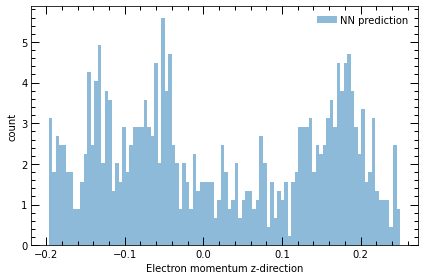

In [54]:
p3e_nn = prediction[:,2] 


plt.hist(p3e_nn, 100, alpha=0.5, label='NN prediction', density = True)
plt.xlabel('Electron momentum z-direction')
plt.ylabel('count')
plt.legend(loc='upper right')

plt.show()

<ipython-input-55-a5ce3688cacb>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


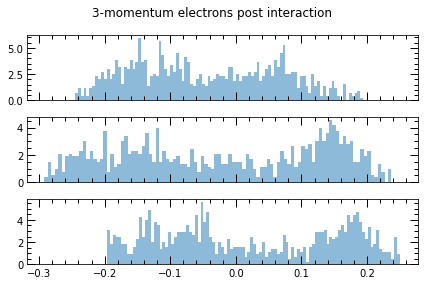

In [55]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('3-momentum electrons post interaction')
axs[0].hist(p1e_nn, 100, alpha=0.5, label='NN prediction', density = True)

axs[1].hist(p2e_nn, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)

axs[2].hist(p3e_nn, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)

fig.show()

In [56]:
from tensorflow import keras 
final_e_nn = []
threshold = 0.5
num = int(1*len(pairs))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for pred in prediction:
    final_e_nn.append(np.linalg.norm(pred))
bar.finish()

[================================================================] 100% of 1000


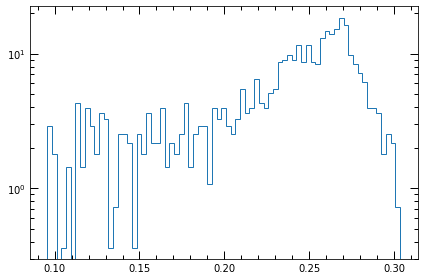

In [57]:
energy_spectrum(final_e_nn, 75)

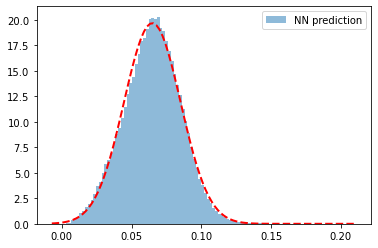

In [23]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean,std=norm.fit(final_e)
plt.hist(final_e, bins=100, alpha = 0.5, label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [24]:
print('mean = ', mean)
print('std = ', std)
print("chi square = ", stats.chisquare(final_e))

mean =  0.0648663518164201
std =  0.020283482527066316
chi square =  Power_divergenceResult(statistic=2121.19790220681, pvalue=1.0)


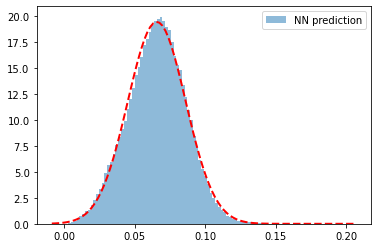

In [25]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean_nn,std_nn=norm.fit(final_e_nn)
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean_nn, std_nn)
plt.plot(x, y,'r--', linewidth=2)
plt.legend(loc='upper right')
plt.show()

In [26]:
print('mean = ', mean_nn)
print('std = ', std_nn)
print("chi square = ", stats.chisquare(final_e_nn))

mean =  0.06551932
std =  0.020531954
chi square =  Power_divergenceResult(statistic=2151.8242773200723, pvalue=1.0)


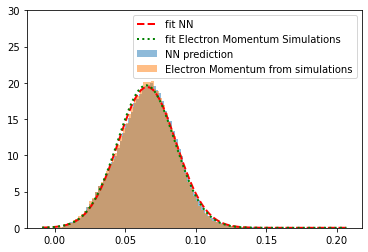

In [28]:
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
plt.hist(final_e, bins=100, alpha = 0.5, label='Electron Momentum from simulations', density = True)
x_nn = np.linspace(xmin, xmax, 100)
y_nn = norm.pdf(x_nn, mean_nn, std_nn)
plt.plot(x_nn, y_nn,'r--', label = 'fit NN', linewidth = 2)
plt.legend(loc='upper right')
x_e = np.linspace(xmin, xmax, 100)
y_e = norm.pdf(x_e, mean, std)
plt.plot(x_e, y_e, 'g:', label = 'fit Electron Momentum Simulations', linewidth = 2)
plt.legend(loc = 'upper right')
plt.ylim((0, 30))
plt.savefig('Fit_250train_250test.png')
plt.show()